# Loan Approval Prediction.

In [1]:
# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split , StratifiedKFold , KFold , cross_val_score , GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder , StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score , precision_score , recall_score , confusion_matrix , accuracy_score

In [3]:
# Load The Dataset

In [4]:
dataset = pd.read_csv("Loan_prediction.csv")

In [5]:
dataset.head()

,age,income,assets,credit_score,debt_to_income_ratio,existing_loan,criminal_record,loan_approved
0,56.0,53779.0,771450.000000,700.0,0.45,1,0,0
1,65.0,141745.0,525485.720059,889.0,0.34,1,1,0
2,60.0,37340.0,459420.000000,788.0,0.35,0,1,0
3,61.0,101388.0,168102.000000,831.0,0.32,1,1,0
4,27.0,83269.0,187546.000000,691.0,0.21,0,0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12367 entries, 0 to 12366
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   12367 non-null  float64
 1   income                12367 non-null  float64
 2   assets                12367 non-null  float64
 3   credit_score          12367 non-null  float64
 4   debt_to_income_ratio  12367 non-null  float64
 5   existing_loan         12367 non-null  int64  
 6   criminal_record       12367 non-null  int64  
 7   loan_approved         12367 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 773.1 KB


In [7]:
dataset.describe()

,age,income,assets,credit_score,debt_to_income_ratio,existing_loan,criminal_record,loan_approved
count,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000,12367.000000
mean,42.487179,90571.593927,525485.720059,699.098996,0.300905,0.509097,0.497129,0.113771
std,12.974479,34030.096771,273230.290942,115.078515,0.113162,0.499937,0.500012,0.317545
min,20.000000,30006.000000,50013.000000,500.000000,0.100000,0.000000,0.000000,0.000000
25%,32.000000,61478.000000,291596.000000,601.000000,0.200000,0.000000,0.000000,0.000000
50%,42.487179,90571.593927,525485.720059,699.098996,0.300905,1.000000,0.000000,0.000000
75%,53.000000,119635.000000,761670.500000,799.000000,0.400000,1.000000,1.000000,0.000000
max,65.000000,149976.000000,999984.000000,900.000000,0.500000,1.000000,1.000000,1.000000


In [8]:
# Data Preprocessing

In [9]:
# checking null values

In [10]:
dataset.isnull().sum()

age                     0
income                  0
assets                  0
credit_score            0
debt_to_income_ratio    0
existing_loan           0
criminal_record         0
loan_approved           0
dtype: int64

In [11]:
# Removing Duplicate rows

In [12]:
dataset.duplicated().sum()

0

In [13]:
# Outliers

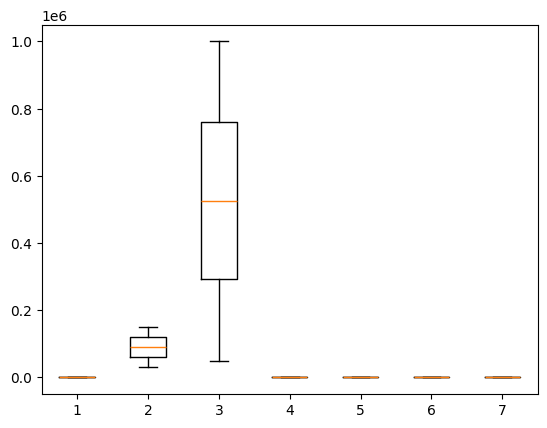

In [14]:
plt.boxplot(dataset[['age','income','assets','credit_score','debt_to_income_ratio','existing_loan','criminal_record']])
plt.show()

In [15]:
# Spliting The Data Into Train And Test

In [16]:
x = dataset.iloc[:,:-1]
y = dataset['loan_approved']

In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [18]:
print(f"Testing Shape : {X_test.shape}")
print(f"Trainging Shape : {X_train.shape}")

Testing Shape : (2474, 7)
Trainging Shape : (9893, 7)


In [19]:
# Scaling The Data

In [20]:
numeric_colum = X_train.select_dtypes(include=['int64','float64']).columns

In [21]:
scaler = StandardScaler()

In [22]:
X_train[numeric_colum] = scaler.fit_transform(X_train[numeric_colum])
X_test[numeric_colum] = scaler.transform(X_test[numeric_colum])

In [23]:
# Model Training

In [24]:
# Balancing The Class Distribution

In [25]:
value , count = np.unique(Y_train , return_counts=True)
before = dict(zip(value ,count))
print(f"Before Class Distribution {before}")

Before Class Distribution {0: 8773, 1: 1120}


In [26]:
print(f"Shape before : {Y_train.shape}")

Shape before : (9893,)


In [27]:
sm = SMOTE()

In [28]:
x_train , y_train = sm.fit_resample(X_train , Y_train)

In [29]:
value2 , count2 = np.unique(y_train , return_counts=True)
after = dict(zip(value2 , count2))
print(f"After Class Distribution : {after}")
print(f"Shape After {x_train.shape}")

After Class Distribution : {0: 8773, 1: 8773}
Shape After (17546, 7)


In [30]:
models = {

    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'XGBoost':xgb.XGBClassifier()
}

In [31]:
for name , model in models.items():
    model.fit(x_train , y_train)
    y_pred = model.predict(X_test)
    print(f"{name} | Accuracy Score : {accuracy_score(Y_test , y_pred)*100:.3f}%")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model , x_train , y_train , cv=cv , scoring='f1')
    print(f"{name} | Mean F1-Score After CV : {np.mean(scores)*100:.3f}\n")

Logistic Regression | Accuracy Score : 93.048%
Logistic Regression | Mean F1-Score After CV : 94.812

KNN | Accuracy Score : 96.120%
KNN | Mean F1-Score After CV : 97.505

SVM | Accuracy Score : 97.817%
SVM | Mean F1-Score After CV : 98.644

Decision Tree | Accuracy Score : 100.000%
Decision Tree | Mean F1-Score After CV : 99.994

Random Forest | Accuracy Score : 99.960%
Random Forest | Mean F1-Score After CV : 99.989

AdaBoost | Accuracy Score : 100.000%
AdaBoost | Mean F1-Score After CV : 100.000

GradientBoost | Accuracy Score : 100.000%
GradientBoost | Mean F1-Score After CV : 100.000

XGBoost | Accuracy Score : 100.000%
XGBoost | Mean F1-Score After CV : 100.000



In [32]:
# best Model

In [33]:
best_model = GradientBoostingClassifier(max_depth=5, n_estimators=100)
best_model.fit(x_train , y_train)
y_pred = best_model.predict(X_test)

In [34]:
# Model Evaluation

In [35]:
print(f"Training Score : {best_model.score(x_train , y_train)*100}%")
print(f"Testing Score : {best_model.score(X_test , Y_test)*100}%")
print("Accuracy Score :",accuracy_score(y_pred,Y_test)*100)
print("Recall Score :",round(recall_score(y_pred,Y_test)*100,3))
print("Precsion Score :",round(precision_score(y_pred,Y_test)*100,3))
print("F1 Score :",round(f1_score(y_pred,Y_test)*100,3))

Training Score : 100.0%
Testing Score : 100.0%
Accuracy Score : 100.0
Recall Score : 100.0
Precsion Score : 100.0
F1 Score : 100.0


In [36]:
# confusion Matrix

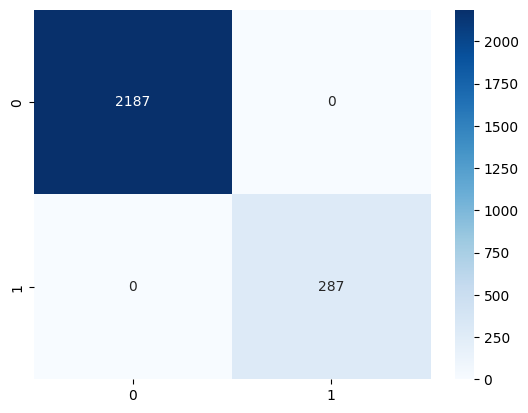

In [37]:
cm = confusion_matrix(Y_test , y_pred)
sns.heatmap(data=cm , annot=True , fmt='g',cmap='Blues')
plt.show()

In [38]:
# Save The Model

In [39]:
joblib.dump(best_model , "Loan_prd_model.pkl")
joblib.dump(scaler , "Loan_prd_scaler.pkl")
print("Saved Successfully")

Saved Successfully
